# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# loading the dataset
hotel = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

<IPython.core.display.Javascript object>

In [4]:
# first 5 rows
data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [5]:
# last 5 rows
data.tail(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

In [6]:
# shape of the dataset
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

- Dataset has 36275 rows and 19 columns

In [7]:
# checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [8]:
# checking for duplicate values
data.duplicated().value_counts()

False    36275
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# dropping the Booking_ID column first before we proceed forward
df = data.drop(columns="Booking_ID")
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [10]:
# checking the statistical summary of the data
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000
mean,1.84496,0.10528,0.81072,2.20430,0.03099,85.23256,2017.82043,7.42365,15.59700,0.02564,0.02335,0.15341,103.42354,0.61966
std,0.51871,0.40265,0.87064,1.41090,0.17328,85.93082,0.38384,3.06989,8.74045,0.15805,0.36833,1.75417,35.08942,0.78624
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2017.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,0.00000,0.00000,1.00000,0.00000,17.00000,2018.00000,5.00000,8.00000,0.00000,0.00000,0.00000,80.30000,0.00000
50%,2.00000,0.00000,1.00000,2.00000,0.00000,57.00000,2018.00000,8.00000,16.00000,0.00000,0.00000,0.00000,99.45000,0.00000
75%,2.00000,0.00000,2.00000,3.00000,0.00000,126.00000,2018.00000,10.00000,23.00000,0.00000,0.00000,0.00000,120.00000,1.00000
max,4.00000,10.00000,7.00000,17.00000,1.00000,443.00000,2018.00000,12.00000,31.00000,1.00000,13.00000,58.00000,540.00000,5.00000


<IPython.core.display.Javascript object>

### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### lead time

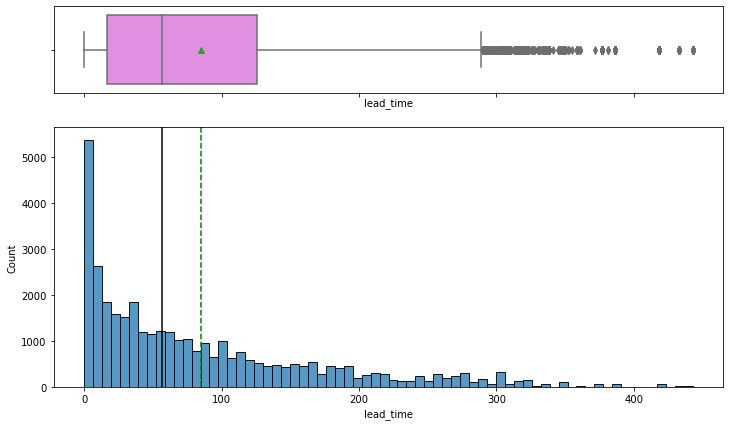

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "lead_time")

- The distribution is right skewed. There are outliers in this variable.
- The highest number of bookings have smaller lead time.

### average price per room

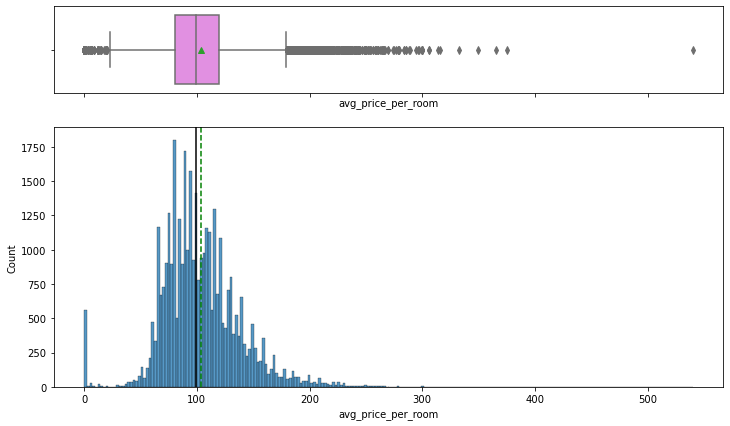

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "avg_price_per_room")

- The distribution is almost normal.There are outliers in this variable.

In [14]:
df[df["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [15]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

<IPython.core.display.Javascript object>

In [17]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

### number of previous booking cancellations

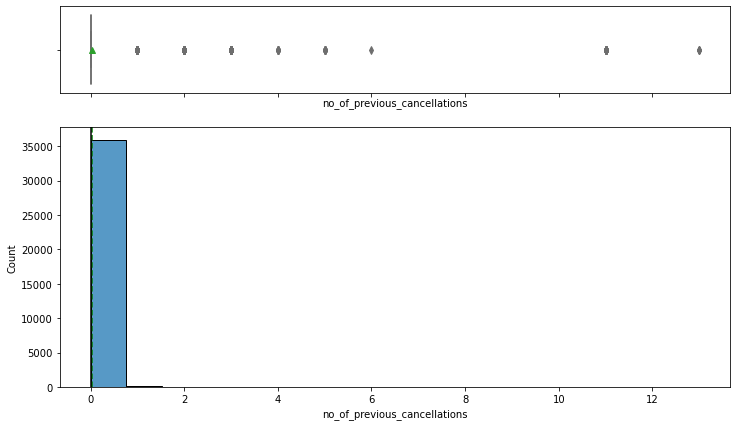

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "no_of_previous_cancellations")

- The distribution is right skewed. There are outliers in this variable.

### number of previous booking not canceled

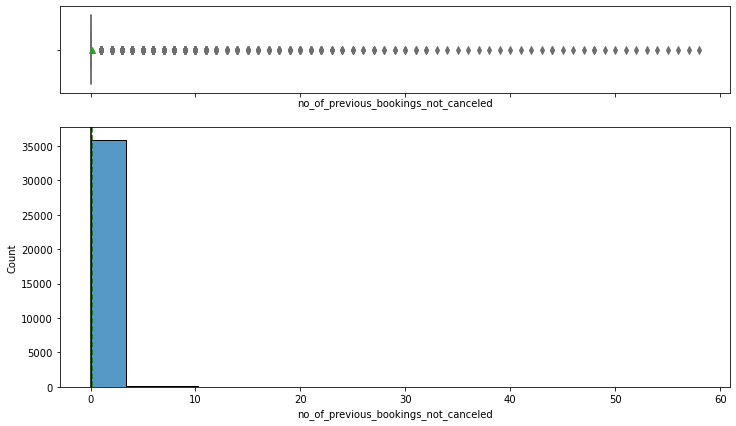

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

- The distribution is right skewed. There are outliers in this variable.

In [20]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

<IPython.core.display.Javascript object>

### number of adults

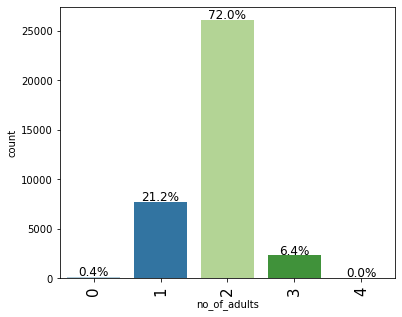

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(df, "no_of_adults", perc=True)

### number of children

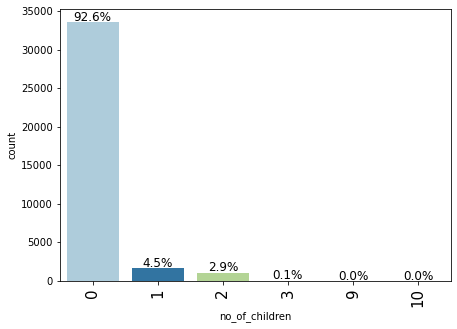

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "no_of_children", perc=True)

- 92.6% of customers had no kids.

In [23]:
# replacing 9, and 10 children with 3
# df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

### number of week nights

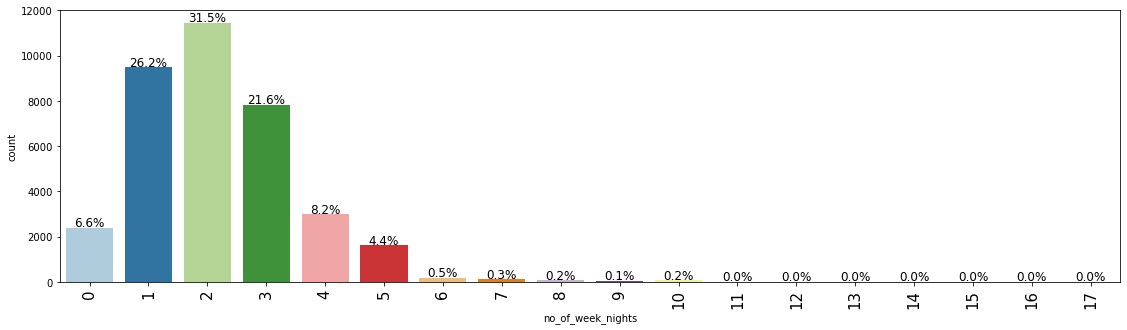

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "no_of_week_nights", perc=True)

- Most of the customers booked 2 week nights.

### number of weekend nights

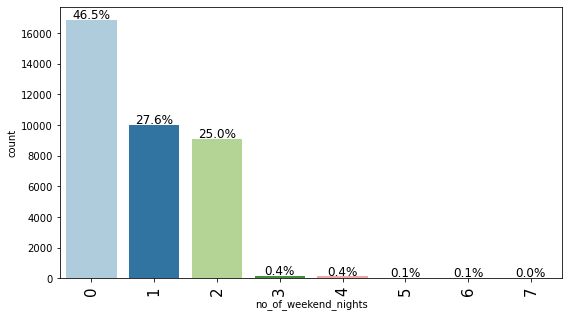

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

### required car parking space

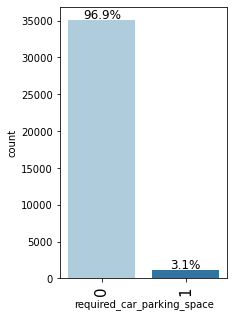

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "required_car_parking_space", perc=True)

- 96.9% customers do not require car parking space.

### type of meal plan

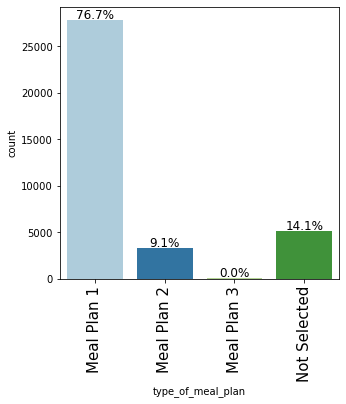

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

- Meal Plan 1 is the most preferred one with 76.7% customers.

### room type reserved

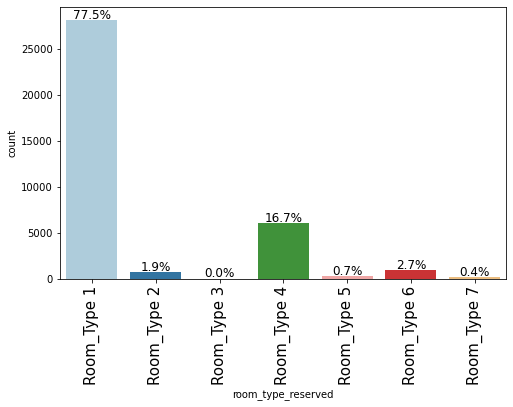

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "room_type_reserved", perc=True)

- Room Type 1 is the most preferred one.

### arrival month

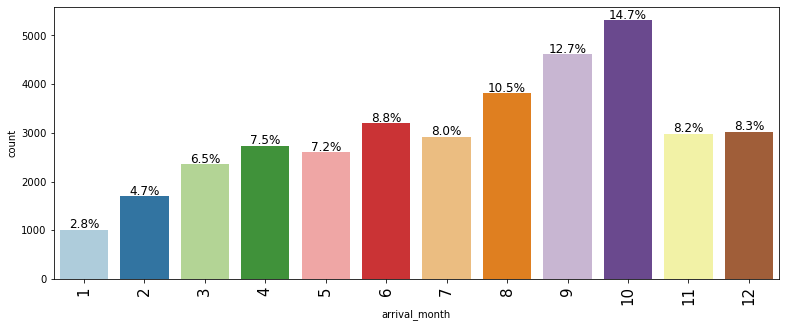

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "arrival_month", perc=True)

- Oct is the busiest month.

### market segment type

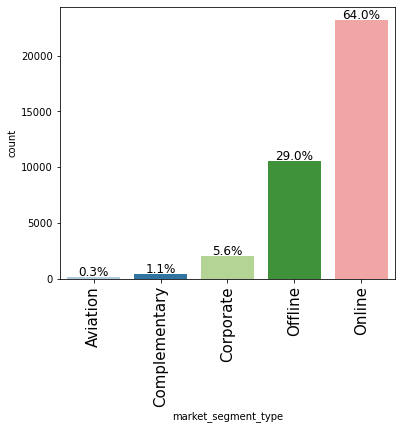

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "market_segment_type", perc=True)

- Most of the guests come from Online market segment (64%).

### number of special requests

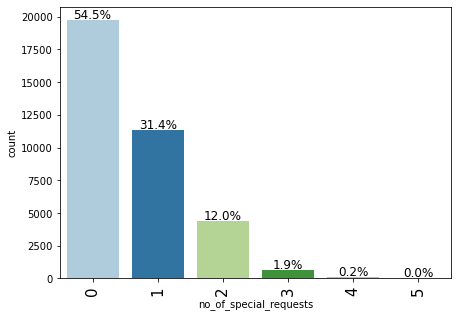

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "no_of_special_requests", perc=True)

- 54.5% customers do not have special requests. 31.4% customers have 1 special request.

### booking status

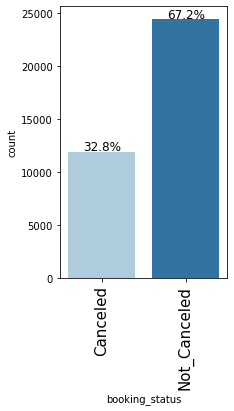

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "booking_status", perc=True)

- 67.2% bookings are not cancelled and 32.8% bookings are cancelled.

### Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis

In [33]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

### Bivariate Analysis¶

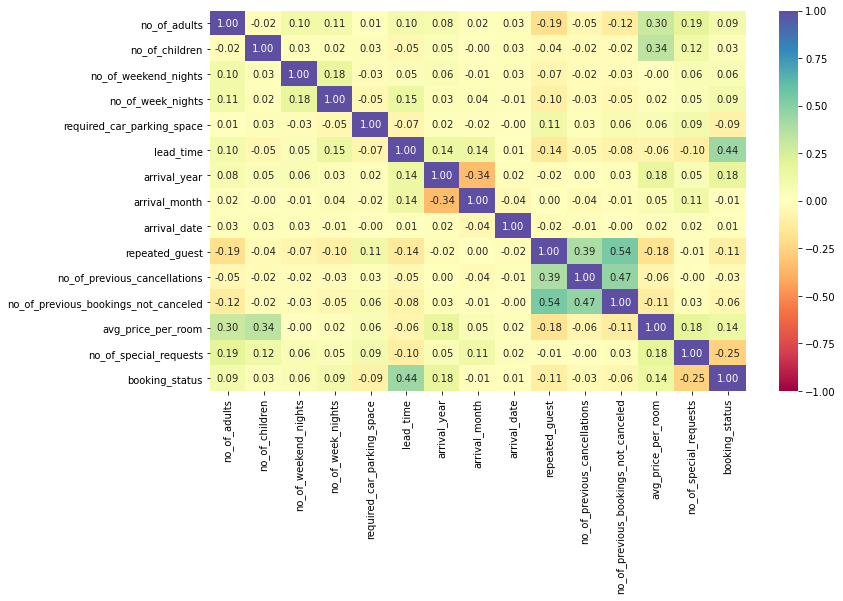

<IPython.core.display.Javascript object>

In [34]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Booking status shows positive correlation with the lead time(0.44).
- No. of previous booking not cancelled shows positive co-relation with repeated guest (0.54).

**Creating functions that will help us with further analysis.**

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [36]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Checking how hotel rates vary across different market segments

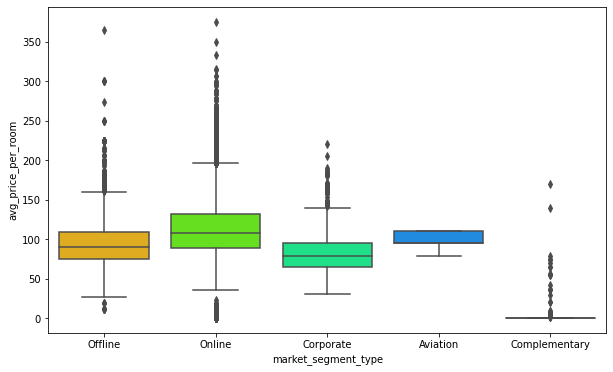

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- We clearly see the differences in room prices in different market segments. Online rates are highest followed by offline. 

### Checking how booking status varies across different market segments. 

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


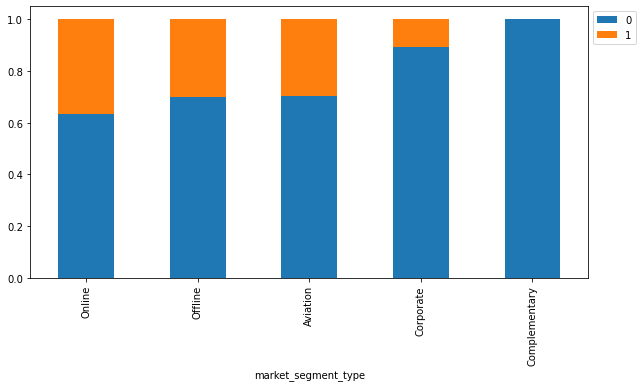

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(df, "market_segment_type", "booking_status")

- Complementary customers have no cancellations. Corporate segment has less cancellations. Most of the cancellations are in the online, offline and aviation segment. 

### Special requirements vs cancellations

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


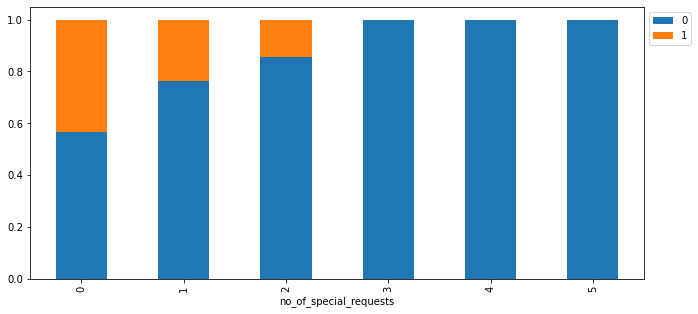

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

- Greater the special requirements, lesser the cancellations.
- We observe that, the customers with no special requirements cancel more bookings.

###  Checking how the special requests made by the customers impacts the prices of a room

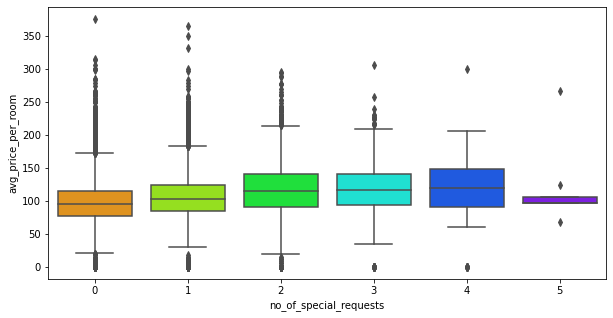

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- Prices are higher as per number of special requests.

### Analyzing the correlation between booking status and average price per room

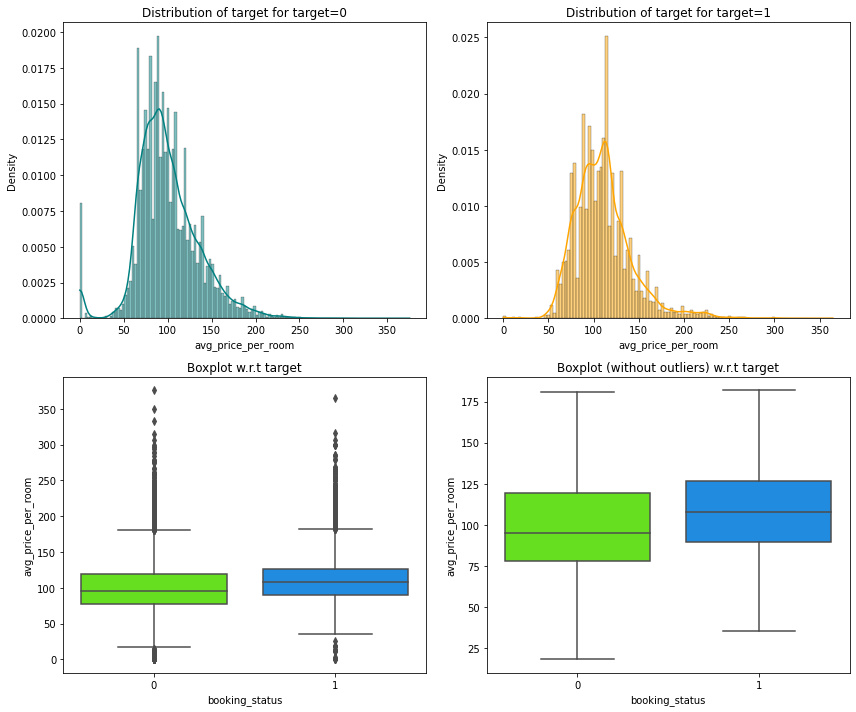

<IPython.core.display.Javascript object>

In [41]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

- We observe that there are more cancellations when the  average price of the room is higher.

### Analyzing the correlation between booking status and lead time 

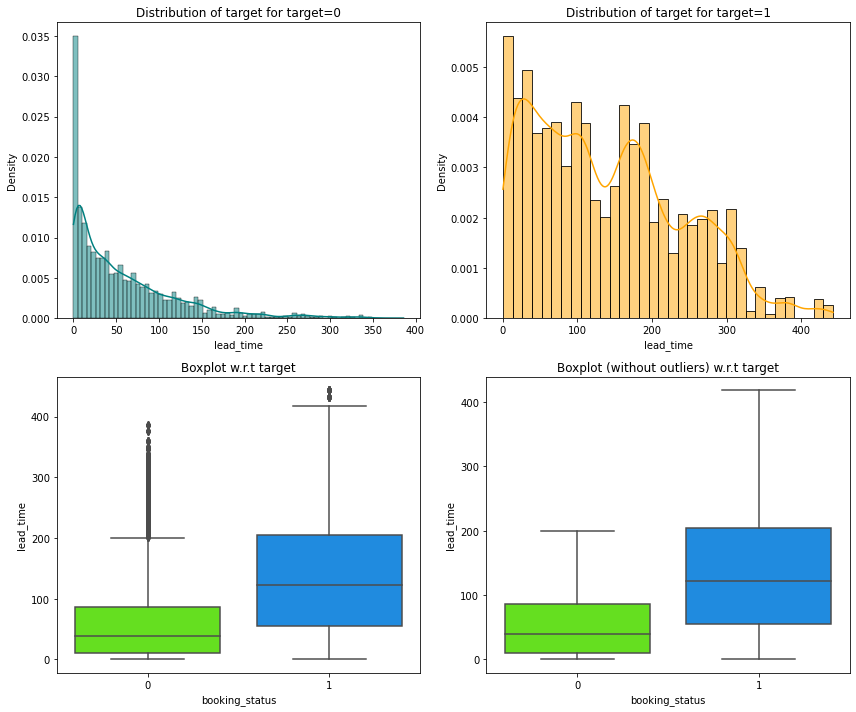

<IPython.core.display.Javascript object>

In [42]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

- Cancellations are more when the lead time is higher.

### Creating a new dataframe of the customers who traveled with their families

In [43]:
family_df = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_df.shape

(28441, 18)

<IPython.core.display.Javascript object>

In [44]:
family_df["no_of_family_members"] = (
    family_df["no_of_adults"] + family_df["no_of_children"]
)

<IPython.core.display.Javascript object>

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


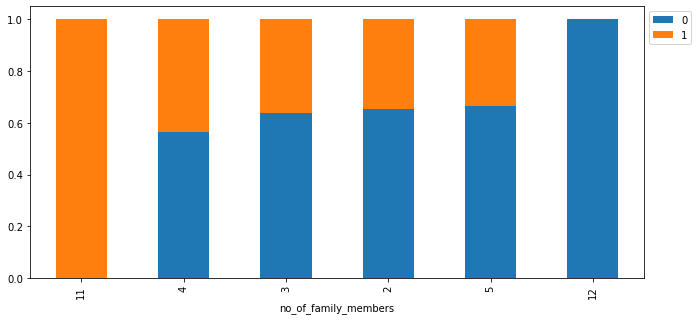

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(family_df, "no_of_family_members", "booking_status")

- We observe that there is no specific co-relation between the number of family members and booking status.

### Analyzing customers who stay for at least a day at the hotel

In [46]:
stay_df = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_df.shape

(17094, 18)

<IPython.core.display.Javascript object>

In [47]:
stay_df["total_days"] = stay_df["no_of_week_nights"] + stay_df["no_of_weekend_nights"]

<IPython.core.display.Javascript object>

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

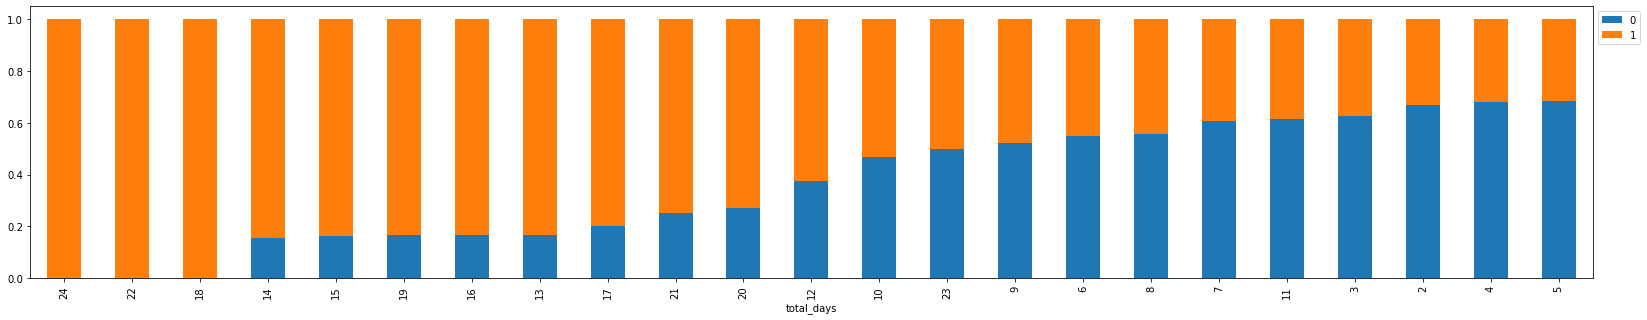

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(stay_df, "total_days", "booking_status")

- The least number of total days seem to have lesser number of cancellations.

### Checking what percentage of repeating guests cancel

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


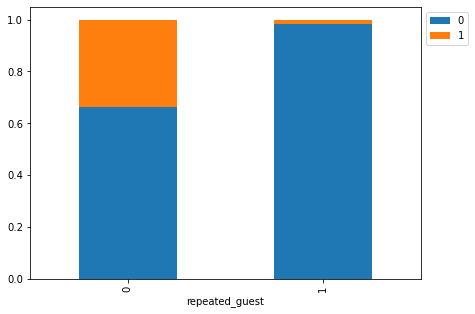

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(df, "repeated_guest", "booking_status")

In [50]:
df.groupby("repeated_guest")["booking_status"].value_counts(normalize=True)

repeated_guest  booking_status
0               0                0.66420
                1                0.33580
1               0                0.98280
                1                0.01720
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

- The percentage of repeating guests who cancelled the booking is 1.7%.
- Compared to this, the non-repeating guests tend to cancel more (33.5%).

### Checking the busiest months in the hotel

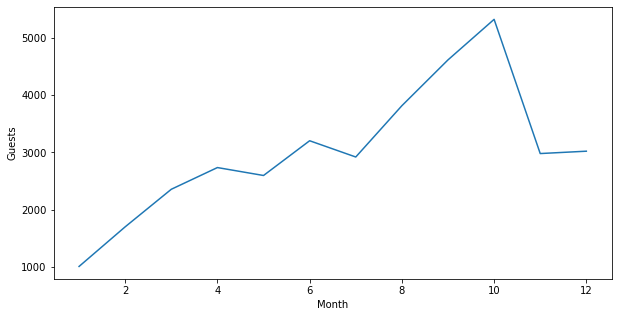

<IPython.core.display.Javascript object>

In [51]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

- Oct is the busiest month.

### Checking the percentage of bookings canceled in each month

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


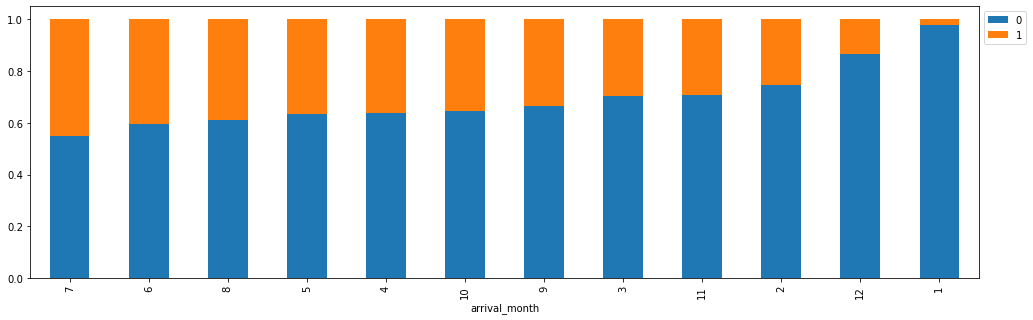

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(df, "arrival_month", "booking_status")

In [53]:
df.groupby("arrival_month")["booking_status"].value_counts(normalize=True)

arrival_month  booking_status
1              0                0.97633
               1                0.02367
2              0                0.74765
               1                0.25235
3              0                0.70314
               1                0.29686
4              0                0.63633
               1                0.36367
5              0                0.63510
               1                0.36490
6              0                0.59694
               1                0.40306
7              0                0.55000
               1                0.45000
8              0                0.60976
               1                0.39024
9              0                0.66645
               1                0.33355
10             0                0.64642
               1                0.35358
11             0                0.70638
               1                0.29362
12             0                0.86693
               1                0.13307
Name: book

<IPython.core.display.Javascript object>

- January sees the least percentage of cancellations(2.3% cancelled).

### Prices across different months

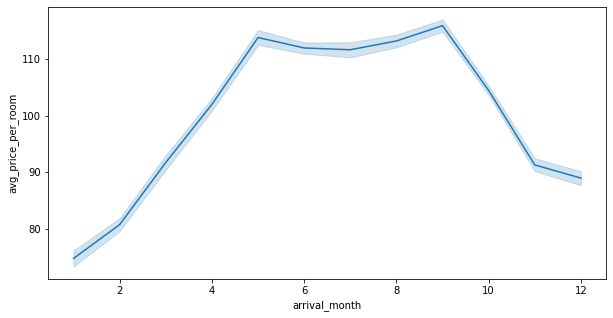

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df, x="arrival_month", y="avg_price_per_room"
)  ## Complete the code to create lineplot between average price per room and arrival month
plt.show()

- Prices are higher during spring, summer and fall.

 ## Data Preprocessing

In [55]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

- There are no null values in the given data.

### Outlier Check

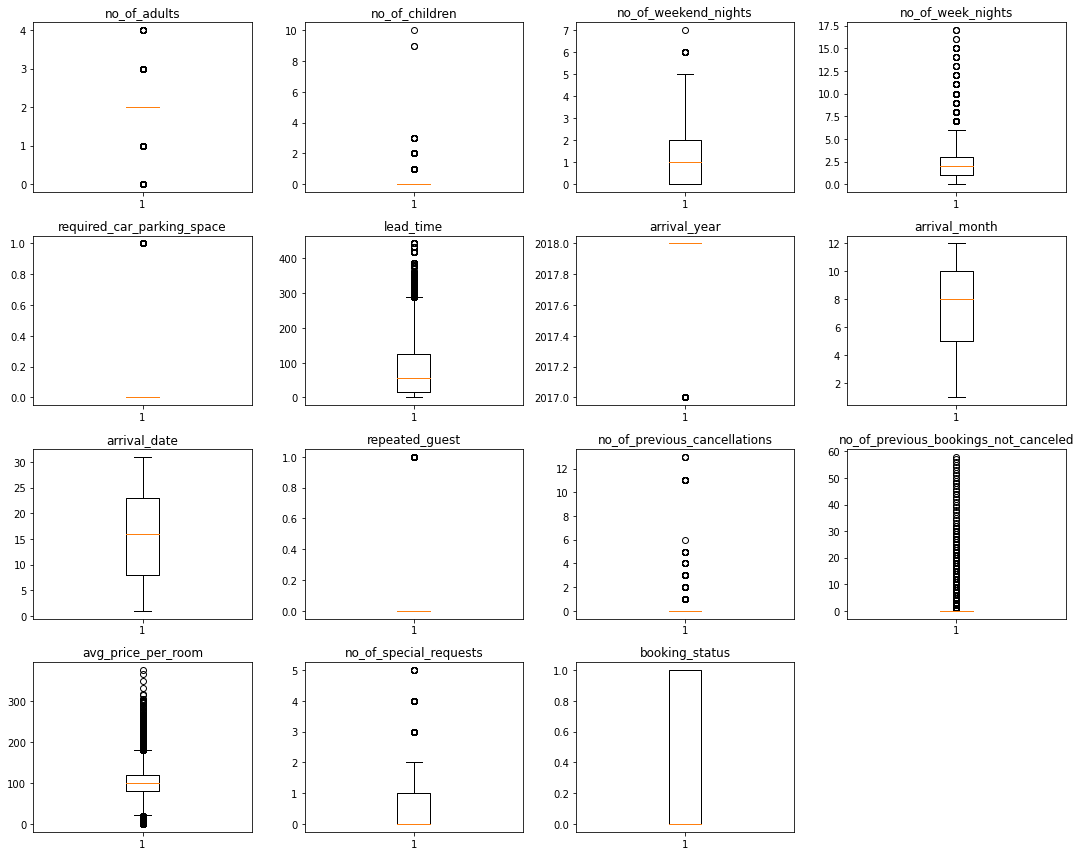

<IPython.core.display.Javascript object>

In [56]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [57]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [58]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [59]:
# We will treat outliers for columns lead_time and avg_price_per_room.
# Rest of the columns, we will not treat as most are discrete values.
treat_out_cols = ["lead_time", "avg_price_per_room"]
data = treat_outliers_all(df, treat_out_cols)

<IPython.core.display.Javascript object>

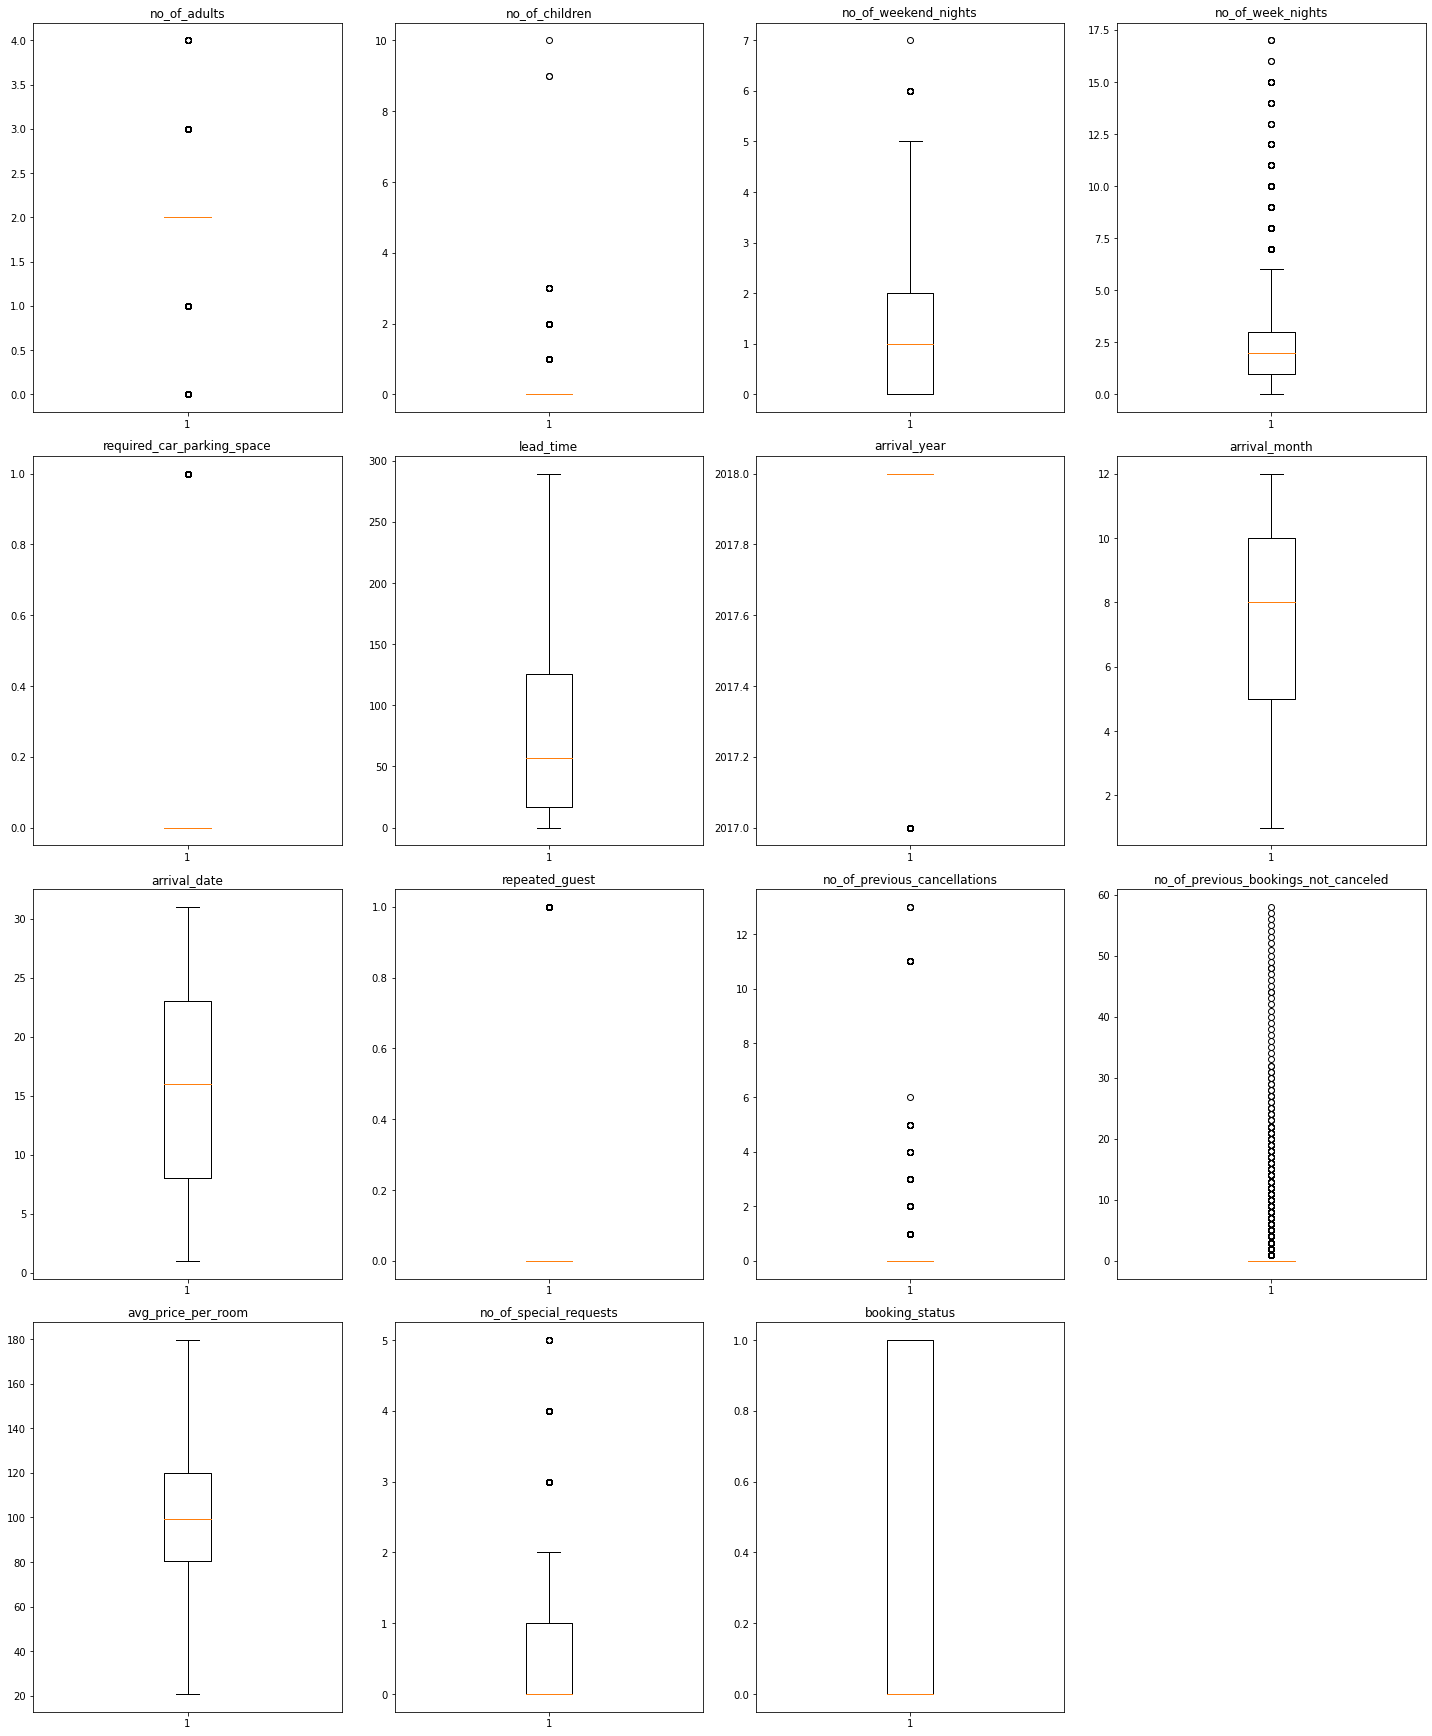

<IPython.core.display.Javascript object>

In [60]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

In [61]:
# define dependent variable
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

<IPython.core.display.Javascript object>

In [62]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [63]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()


,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2.00000,0.00000,1.00000,2.00000,0.00000,224.00000,2017.00000,10.00000,2.00000,0.00000,0.00000,0.00000,65.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,1.00000,2.00000,0.00000,2.00000,3.00000,0.00000,5.00000,2018.00000,11.00000,6.00000,0.00000,0.00000,0.00000,106.68000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,1.00000,1.00000,0.00000,2.00000,1.00000,0.00000,1.00000,2018.00000,2.00000,28.00000,0.00000,0.00000,0.00000,60.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,1.00000,2.00000,0.00000,0.00000,2.00000,0.00000,211.00000,2018.00000,5.00000,20.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
4,1.00000,2.00000,0.00000,1.00000,1.00000,0.00000,48.00000,2018.00000,4.00000,11.00000,0.00000,0.00000,0.00000,94.50000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

In [64]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [65]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


<IPython.core.display.Javascript object>

In [66]:
# fitting a linear model
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         booking_status   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     497.6
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:01:04   Log-Likelihood:                -11460.
No. Observations:               25392   AIC:                         2.298e+04
Df Residuals:                   25364   BIC:                         2.320e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Check for multicollinearity

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [68]:
vif = checking_vif(X_train)

<IPython.core.display.Javascript object>

In [69]:
vif1 = vif[vif["VIF"] > 5]
vif1

,feature,VIF
0,const,39376350.18118
25,market_segment_type_Corporate,16.93087
26,market_segment_type_Offline,64.13723
27,market_segment_type_Online,71.19991


<IPython.core.display.Javascript object>

In [70]:
col_to_drop = "market_segment_type_Online"
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Checking VIF now
vif = checking_vif(X_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  market_segment_type_Online


,feature,VIF
0,const,39296557.93824
1,no_of_adults,1.33429
2,no_of_children,1.97337
3,no_of_weekend_nights,1.07028
4,no_of_week_nights,1.09853
5,required_car_parking_space,1.03958
6,lead_time,1.38187
7,arrival_year,1.42499
8,arrival_month,1.27320
9,arrival_date,1.00659


<IPython.core.display.Javascript object>

- All features have vif<5. We can proceed further.

In [71]:
# initial list of columns excluding dummy variables
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [72]:
X_train2 = X_train1[selected_features]
X_test2 = X_test1[selected_features]

<IPython.core.display.Javascript object>

In [73]:
olsmodel2 = sm.OLS(y_train, X_train2).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         booking_status   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     671.5
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:01:06   Log-Likelihood:                -11463.
No. Observations:               25392   AIC:                         2.297e+04
Df Residuals:                   25371   BIC:                         2.314e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

In [74]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train2.astype(float))

<IPython.core.display.Javascript object>

In [75]:
lg = logit.fit()
print(lg.summary())

         Current function value: 0.425211
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 26 Feb 2022   Pseudo R-squ.:                  0.3290
Time:                        23:01:06   Log-Likelihood:                -10797.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1000.6332    120.764     -8.286      0.000   -1237.326

<IPython.core.display.Javascript object>

In [76]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [77]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [78]:
model_performance_classification_statsmodels(lg, X_train2, y_train)

,Accuracy,Recall,Precision,F1
0,0.80549,0.63530,0.73771,0.68269


<IPython.core.display.Javascript object>

In [79]:
# converting coefficients to odds
odds = np.exp(lg.params)

# finding the percentage change
perc_change_odds = (np.exp(lg.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.10313,1.14730,1.11023,1.03808,0.20148,1.01646,1.63951,0.96045,0.52381,1.01987,0.22862,1.30479,1.34786,0.71013,0.75717,0.49676,0.52659,0.00000,0.44283,0.16755
Change_odd%,-100.00000,10.31334,14.72955,11.02338,3.80839,-79.85220,1.64555,63.95097,-3.95482,-47.61868,1.98727,-77.13811,30.47913,34.78620,-28.98681,-24.28297,-50.32356,-47.34138,-100.00000,-55.71715,-83.24522


<IPython.core.display.Javascript object>

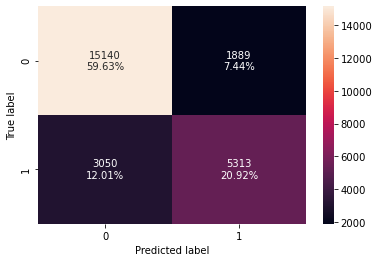

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train2, y_train)

In [81]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg, X_train2, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80549,0.63530,0.73771,0.68269


<IPython.core.display.Javascript object>

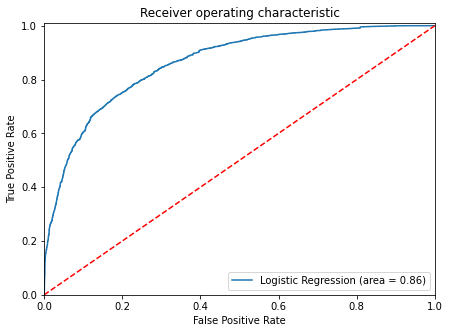

<IPython.core.display.Javascript object>

In [82]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Model is performing well on the training set.

#### Let's try to improved further the recall score  by changing the model threshold using AUC-ROC Curve.

In [83]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.36550794692375493


<IPython.core.display.Javascript object>

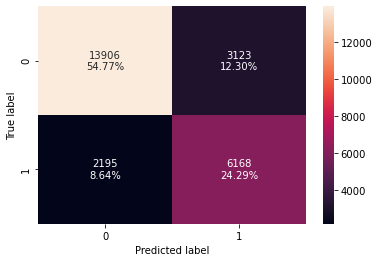

<IPython.core.display.Javascript object>

In [84]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train2, y_train, threshold=optimal_threshold_auc_roc)

In [85]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79056,0.73753,0.66387,0.69877


<IPython.core.display.Javascript object>

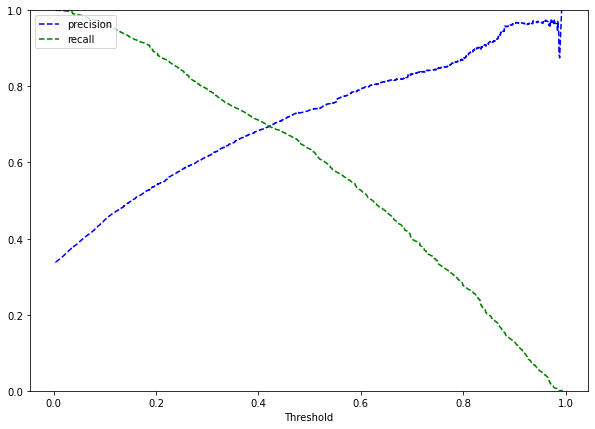

<IPython.core.display.Javascript object>

In [86]:
y_scores = lg.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [87]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

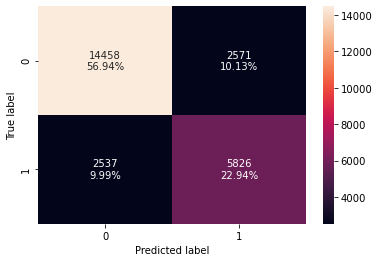

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train2, y_train, threshold=optimal_threshold_curve)

In [89]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79883,0.69664,0.69382,0.69523


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

Using model with default threshold

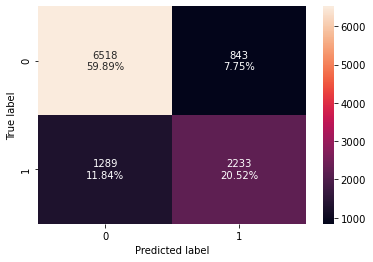

<IPython.core.display.Javascript object>

In [90]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg, X_test2, y_test
)  

In [91]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg, X_test2, y_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80410,0.63401,0.72594,0.67687


<IPython.core.display.Javascript object>

### ROC curve on test set

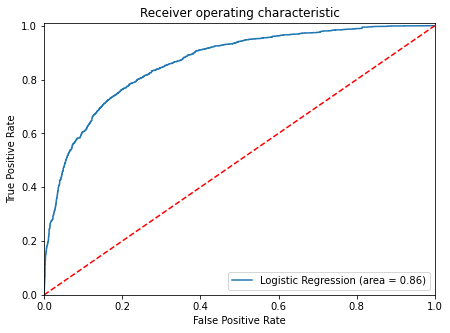

<IPython.core.display.Javascript object>

In [92]:
logit_roc_auc_train = roc_auc_score(y_test, lg.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using model with threshold=0.37

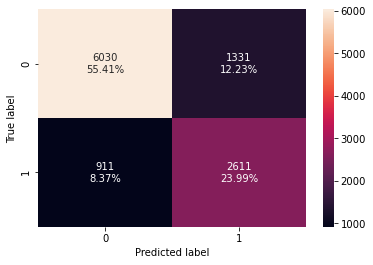

<IPython.core.display.Javascript object>

In [93]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg, X_test2, y_test, threshold=optimal_threshold_auc_roc
)  

In [94]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79399,0.74134,0.66235,0.69962


<IPython.core.display.Javascript object>

#### Using model with threshold = 0.42

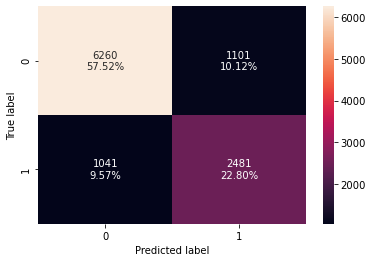

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_statsmodels(lg, X_test2, y_test, threshold=optimal_threshold_curve)

In [96]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80318,0.70443,0.69263,0.69848


<IPython.core.display.Javascript object>

In [97]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80549,0.79056,0.79883
Recall,0.63530,0.73753,0.69664
Precision,0.73771,0.66387,0.69382
F1,0.68269,0.69877,0.69523


<IPython.core.display.Javascript object>

#### Observation: the threshold of 0.37 seems to provide the best performance (recall score) with training data

In [98]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df


Testing performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80410,0.79399,0.80318
Recall,0.63401,0.74134,0.70443
Precision,0.72594,0.66235,0.69263
F1,0.67687,0.69962,0.69848


<IPython.core.display.Javascript object>

#### Observation: the threshold of 0.37 seems to provide the best performance (recall score) with testing data as well. The performances of training and test models are comparable.

### Building a decision Tree

In [99]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train2, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [100]:
print("Accuracy on training set : ", dTree.score(X_train2, y_train))
print("Accuracy on test set : ", dTree.score(X_test2, y_test))

Accuracy on training set :  0.9935018903591682
Accuracy on test set :  0.8669484517136818


<IPython.core.display.Javascript object>

In [101]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [102]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Checking model performance on training set

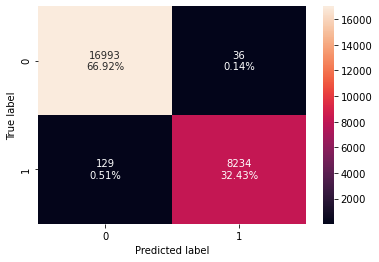

<IPython.core.display.Javascript object>

In [103]:
confusion_matrix_sklearn(dTree, X_train2, y_train)

In [104]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train2, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99350,0.98457,0.99565,0.99008


<IPython.core.display.Javascript object>

### Checking model performance on test set

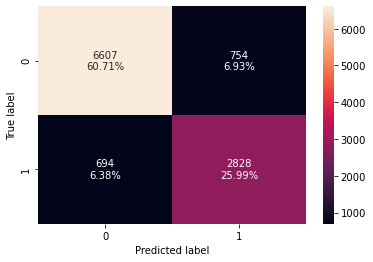

<IPython.core.display.Javascript object>

In [105]:
confusion_matrix_sklearn(dTree, X_test2, y_test)

In [106]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test2, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86695,0.80295,0.78950,0.79617


<IPython.core.display.Javascript object>

### Before pruning the tree let's check the important features.

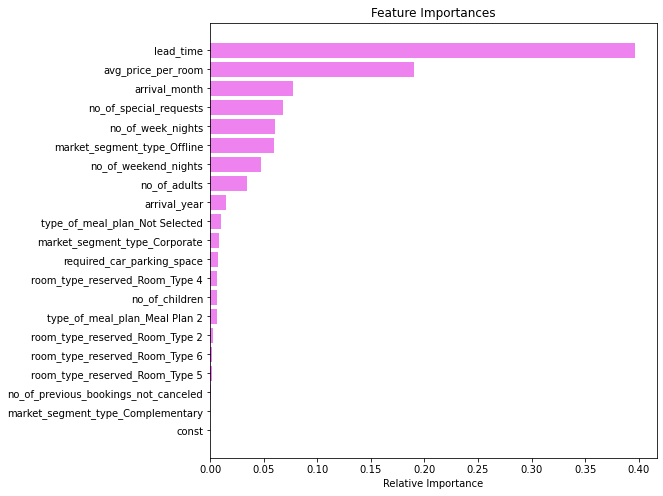

<IPython.core.display.Javascript object>

In [107]:
feature_names = list(X_train2.columns)
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time, average price per room and arrival month are top 3 important features.

### Pruning the tree
- Pre-Pruning

In [108]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train2, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train2, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

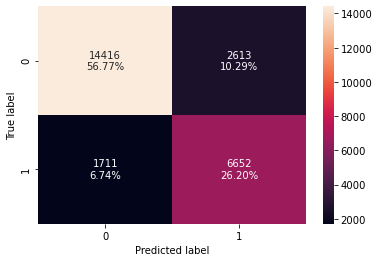

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(estimator, X_train2, y_train)

In [110]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train2, y_train
)  
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.82971,0.79541,0.71797,0.75471


<IPython.core.display.Javascript object>

#### Checking performance on test set

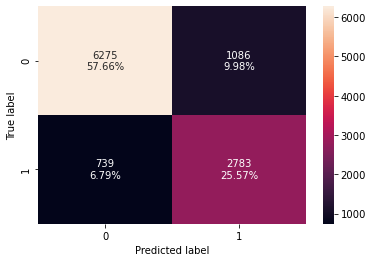

<IPython.core.display.Javascript object>

In [111]:
confusion_matrix_sklearn(estimator, X_test2, y_test)

In [112]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test2, y_test
) 
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83231,0.79018,0.71931,0.75308


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

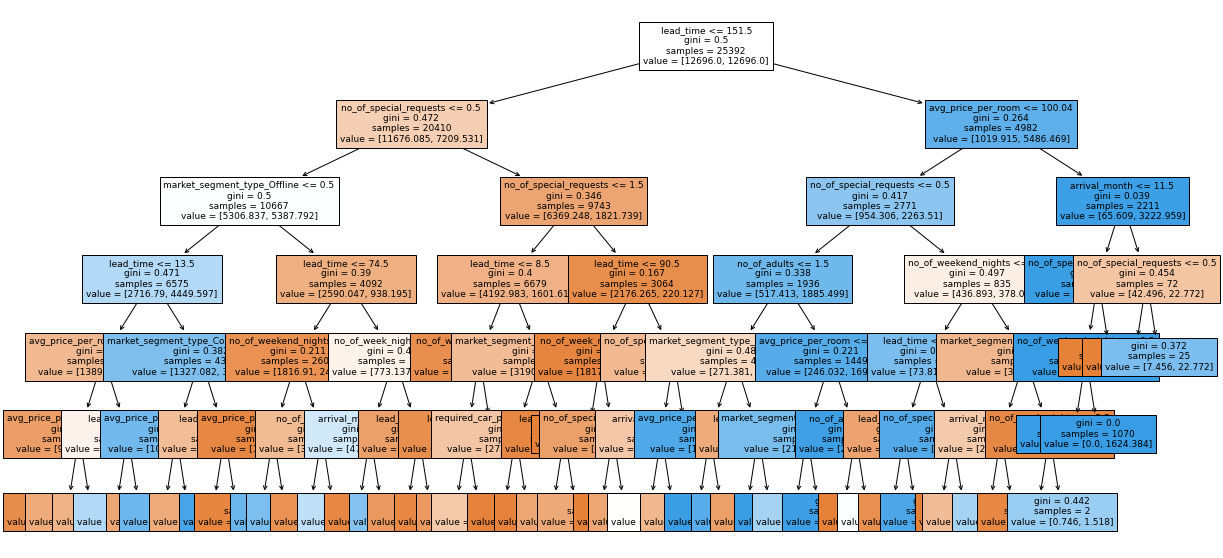

<IPython.core.display.Javascript object>

In [113]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [114]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- avg_price_per_room <= 100.87
|   |   |   |   |   |--- avg_price_per_room <= 74.97
|   |   |   |   |   |   |--- weights: [427.95, 40.99] class: 0
|   |   |   |   |   |--- avg_price_per_room >  74.97
|   |   |   |   |   |   |--- weights: [515.18, 176.10] class: 0
|   |   |   |   |--- avg_price_per_room >  100.87
|   |   |   |   |   |--- lead_time <= 3.50
|   |   |   |   |   |   |--- weights: [266.16, 104.75] class: 0
|   |   |   |   |   |--- lead_time >  3.50
|   |   |   |   |   |   |--- weights: [180.42, 296.03] class: 1
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 60.07
|   |   |   |   |   |   |--- weights: [79.77, 24.29] class: 0
|   |   |   |   |   |--- avg_price_per_room >  60.07
|   |   |   |   |   |   |--- weights: [9

<IPython.core.display.Javascript object>

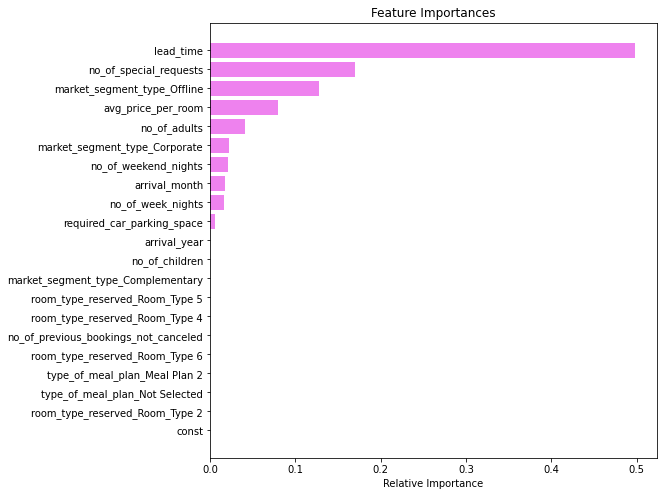

<IPython.core.display.Javascript object>

In [115]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost Complexity Pruning

In [116]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train2, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [117]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00919
1,0.00000,0.00919
2,0.00000,0.00919
3,0.00000,0.00919
4,0.00000,0.00919
...,...,...
1946,0.00980,0.34489
1947,0.02154,0.36643
1948,0.02347,0.38990
1949,0.02893,0.41882


<IPython.core.display.Javascript object>

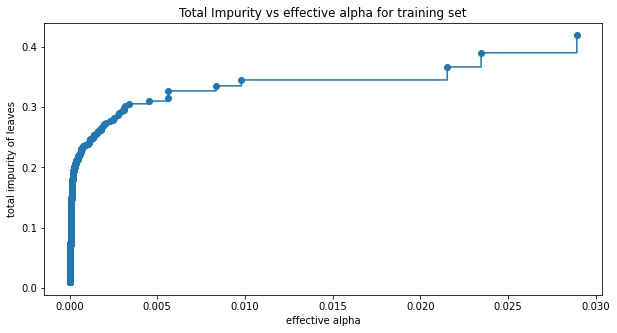

<IPython.core.display.Javascript object>

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [119]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train2, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913706


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases

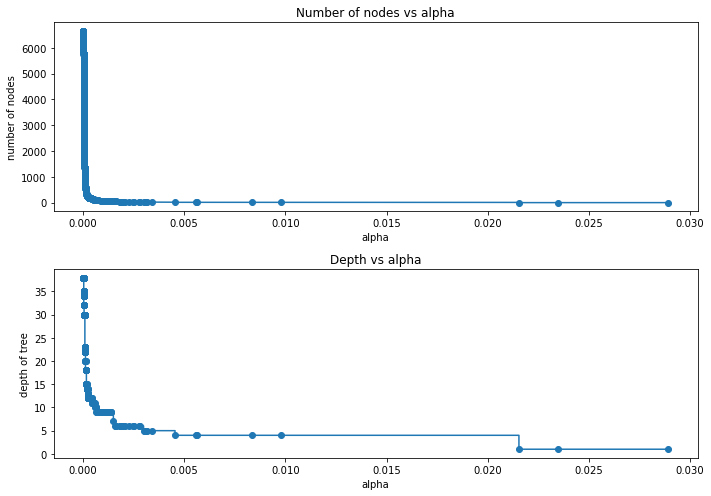

<IPython.core.display.Javascript object>

In [120]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [121]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train2)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test2)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

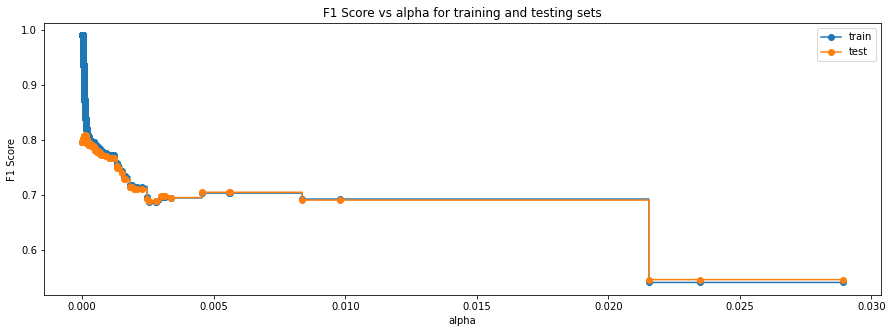

<IPython.core.display.Javascript object>

In [122]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [123]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012357308190223508, random_state=1)


<IPython.core.display.Javascript object>

### Checking performance on training set

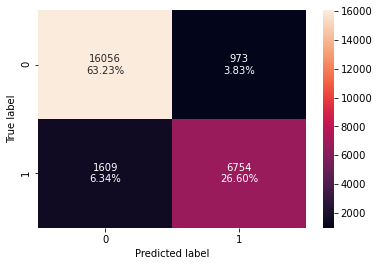

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_sklearn(best_model, X_train2, y_train)

In [125]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train2, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89831,0.80760,0.87408,0.83953


<IPython.core.display.Javascript object>

### Checking performance on test set

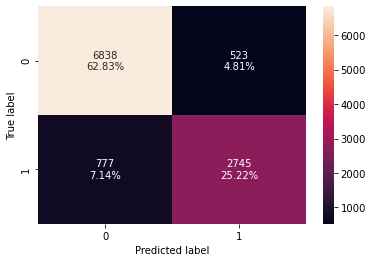

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_sklearn(best_model, X_test2, y_test)

In [127]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test2, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.88055,0.77939,0.83996,0.80854


<IPython.core.display.Javascript object>

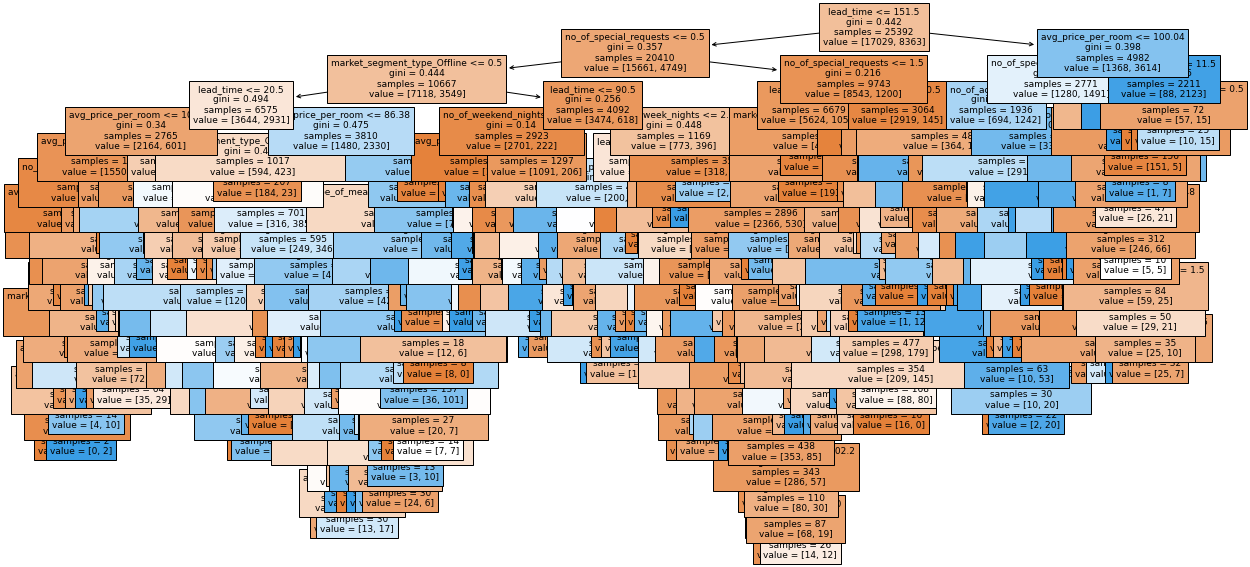

<IPython.core.display.Javascript object>

In [128]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [129]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- avg_price_per_room <= 105.95
|   |   |   |   |   |--- avg_price_per_room <= 78.90
|   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 74.59
|   |   |   |   |   |   |   |   |--- weights: [557.00, 18.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  74.59
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 74.65
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  74.65
|   |   |   |   |   |   |   |   |   |--- arrival_year <= 2017.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 8.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 8.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- arrival_month >  8.50
|   |   |   |  

<IPython.core.display.Javascript object>

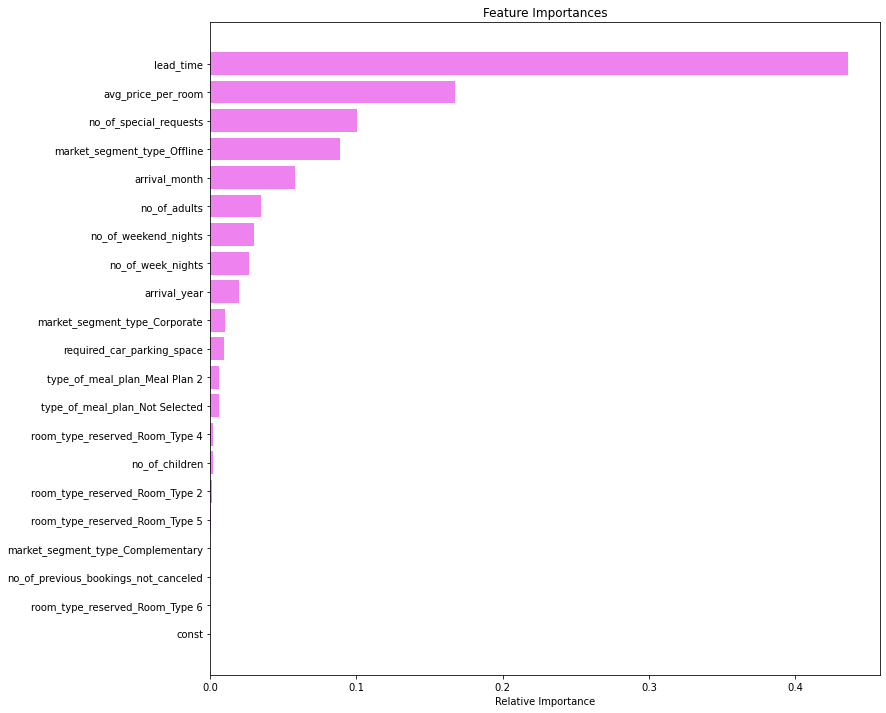

<IPython.core.display.Javascript object>

In [130]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing Decision Tree models

In [131]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99350,0.82971,0.89831
Recall,0.98457,0.79541,0.80760
Precision,0.99565,0.71797,0.87408
F1,0.99008,0.75471,0.83953


<IPython.core.display.Javascript object>

- Decision tree sklearn is giving the highest recall on the train set.

In [132]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99350,0.82971,0.89831
Recall,0.98457,0.79541,0.80760
Precision,0.99565,0.71797,0.87408
F1,0.99008,0.75471,0.83953


<IPython.core.display.Javascript object>

- Decision tree sklearn is giving the highest recall on the test set.

In [133]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with restricted maximum depth",
            "Decision treee with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [1, 0.53, 0.51, 0.63],
        "Test_Recall": [0.46, 0.46, 0.46, 0.56],
    }
)
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00000,0.46000
1,Decision tree with restricted maximum depth,0.53000,0.46000
2,Decision treee with hyperparameter tuning,0.51000,0.46000
3,Decision tree with post-pruning,0.63000,0.56000


<IPython.core.display.Javascript object>

## Actionable Insights

- We analyzed the "INNHotelsGroup" dataset using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to cancel booking or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. 
- Lead time, average price per room, arrival month are the most important variables.

## Recommendations

- We see that higher the prices of room, chances of cancellations are high. The hotels must price their room at competitive prices.
- In the dataset, we observe that the online prices of room are higher than the offline rate. As more customers book online (knowing that they can cancel it for no charge) and most cancellations are in the online segment, it makes sense to charge high online rates to recover losses due to cancellations.
- The booking season picks up from spring and peaks in fall. Incentives and promotions must be run in the winter season to attract customers.
- Higher the lead time, chances of cancellations are high. Hotels might consider not opening up bookings too early.
- The hotel should have a margin for free cancellations and charge a fee or do partial refund for last minute cancellations.
- When cancellations happen, the hotel should gain data from customers asking for reason of cancellation which will help in understanding the problem.
- The repeated guests do not tend to cancel bookings when compared to non-repeated guests. Hence, repeated guests should have a reward system which will help in retaining these guests.